# MCMC fitting
In this notebook, I will read in the RV data and perform the MCMC fit to find the mass-ratio.

[for now, I am writing up how to do an SB2 fit. If that fails again, I will fall back to a partial fit using Stefano's parameters.]

In [1]:
import numpy as np
import pandas as pd
import MassRatio_Fitter
import triangle
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Read in the austral rv fits
rv1_data = pd.read_fwf('data/psi1draa_140p_28_37_ASW.dat', header=None)
t1 = rv1_data[0].values
rv1 = rv1_data[2].values / 1000. # Convert from m/s to km/s
rv1_err = rv1_data[3].values / 1000.

# Read in my measurements for the companion RV
t2, _, _, rv2, rv2_err = np.loadtxt('data/rv_data.txt')
good = ~np.isnan(rv2) and t2 > t2[20]  #Exclude the early points that I don't trust, and the couple others that have no measurements
t2 = t2[good]
rv2 = rv2[good]
rv2_err = rv2_err[good]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

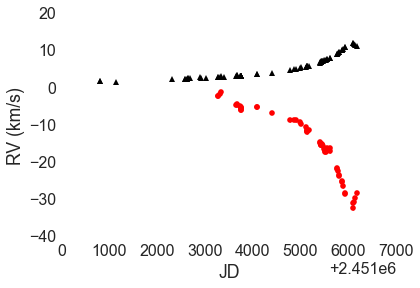

In [4]:
# Plot the RV data just to make sure it looks right
plt.errorbar(t1, rv1, yerr=rv1_err, fmt='k^')
plt.errorbar(t2, rv2, yerr=rv2_err*0.1, fmt='ro')
plt.xlabel('JD')
plt.ylabel('RV (km/s)')

In [ ]:
# Do the fit
sampler = MassRatio_Fitter.full_sb2_fit(t1, rv1, rv1_err, t2, rv2, rv2_err)